In [1]:
import sys
sys.path.insert(0, '../Data')

from fmp_module import *
%matplotlib inline

In [2]:
# Compute chroma features
fn_wav = '../Data/Audios/Chico Buarque - Teresinha.wav'
N = 4096
H = 2048
X_STFT, Fs_X, x, Fs, x_dur = compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=0.1, version='STFT')
X_IIR, Fs_X, x, Fs, x_dur = compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=100, version='IIR')
X_CQT, Fs_X, x, Fs, x_dur = compute_chromagram_from_filename(fn_wav, N=N, H=H, version='CQT')

# Annotations
fn_ann = '../Data/Labels/teresinha_labels.csv'

ann, _ = libfmp.c4.read_structure_annotation(fn_ann)
color_ann = {'N': [1, 1, 1, 1], 'Bm': [1, 0.5, 0, 1], 'B': [0, 1, 0, 1], 
             'Em': [1, 0, 0, 1], 'E': [0, 0, 1, 1], 'F#':[1, 0, 1, 1]}

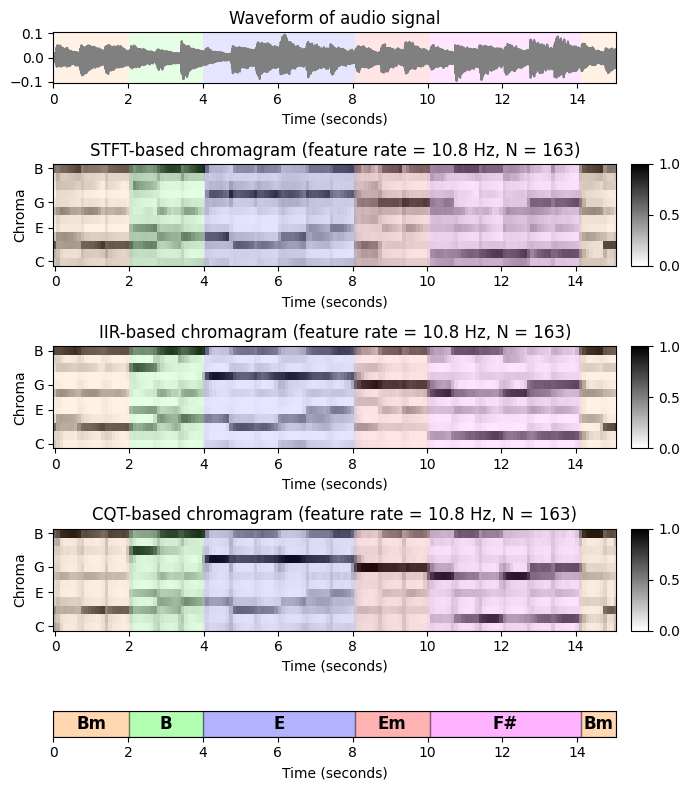

In [3]:
# Plot
cmap = libfmp.b.compressed_gray_cmap(alpha=1, reverse=False)
fig, ax = plt.subplots(5, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [1, 2, 2, 2, 0.5]}, figsize=(7, 8))
libfmp.b.plot_signal(x, Fs, ax=ax[0,0], title='Waveform of audio signal')
libfmp.b.plot_segments_overlay(ann, ax=ax[0,0], time_max=x_dur,
                               print_labels=False, colors=color_ann, alpha=0.1)
ax[0,1].axis('off')

title = 'STFT-based chromagram (feature rate = %0.1f Hz, N = %d)'%(Fs_X, X_STFT.shape[1])
plot_chromagram_annotation([ax[1, 0], ax[1, 1]], X_STFT, Fs_X, ann, color_ann, x_dur, title=title)

title = 'IIR-based chromagram (feature rate = %0.1f Hz, N = %d)'%(Fs_X, X_IIR.shape[1])
plot_chromagram_annotation([ax[2, 0], ax[2, 1]], X_IIR, Fs_X, ann, color_ann, x_dur, title=title)

title = 'CQT-based chromagram (feature rate = %0.1f Hz, N = %d)'%(Fs_X, X_CQT.shape[1])
plot_chromagram_annotation([ax[3, 0], ax[3, 1]], X_CQT, Fs_X, ann, color_ann, x_dur, title=title)

libfmp.b.plot_segments(ann, ax=ax[4, 0], time_max=x_dur, time_label='Time (seconds)',
                       colors=color_ann,  alpha=0.3)
ax[4,1].axis('off')
plt.tight_layout()

In [3]:
song_dict = {}
song_dict[0] = ['Teresinha', 'r', 
                fn_wav,
                fn_ann]

song_selected = [0]

print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='STFT')
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='CQT')
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='IIR')


===== Computation of STFT-based chromagrams =====
Processing:  Teresinha
===== Computation of CQT-based chromagrams =====
Processing:  Teresinha
===== Computation of IIR-based chromagrams =====
Processing:  Teresinha


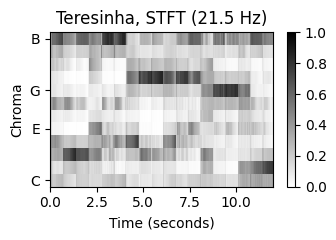

In [4]:
cmap = 'gray_r'
s = song_selected[0]
fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [3]}, figsize=(3.5, 2.5))
title = '%s, STFT (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_STFT[s])
libfmp.b.plot_chromagram(X_dict_STFT[s], Fs=Fs_X_dict_CQT[s], ax=[ax],  
                         chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                         title=title, ylabel='Chroma', colorbar=True, xlim=[0, 12])


plt.tight_layout()

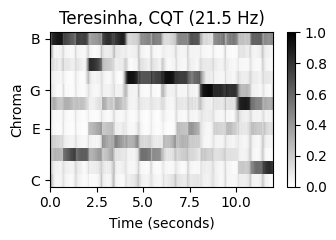

In [5]:
fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, figsize=(3.5, 2.5))
title = '%s, CQT (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_CQT[s])
libfmp.b.plot_chromagram(X_dict_CQT[s], Fs=Fs_X_dict_CQT[s], ax=[ax],  
                         chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                         title=title, ylabel='Chroma', colorbar=True, xlim=[0, 12])  
plt.tight_layout()

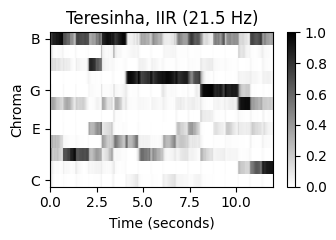

In [6]:
fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, figsize=(3.5, 2.5))
title = '%s, IIR (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_IIR[s])
libfmp.b.plot_chromagram(X_dict_IIR[s], Fs=Fs_X_dict_IIR[s], ax=[ax],  
                         chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                         title=title, ylabel='Chroma', colorbar=True, xlim=[0, 12])      
plt.tight_layout()

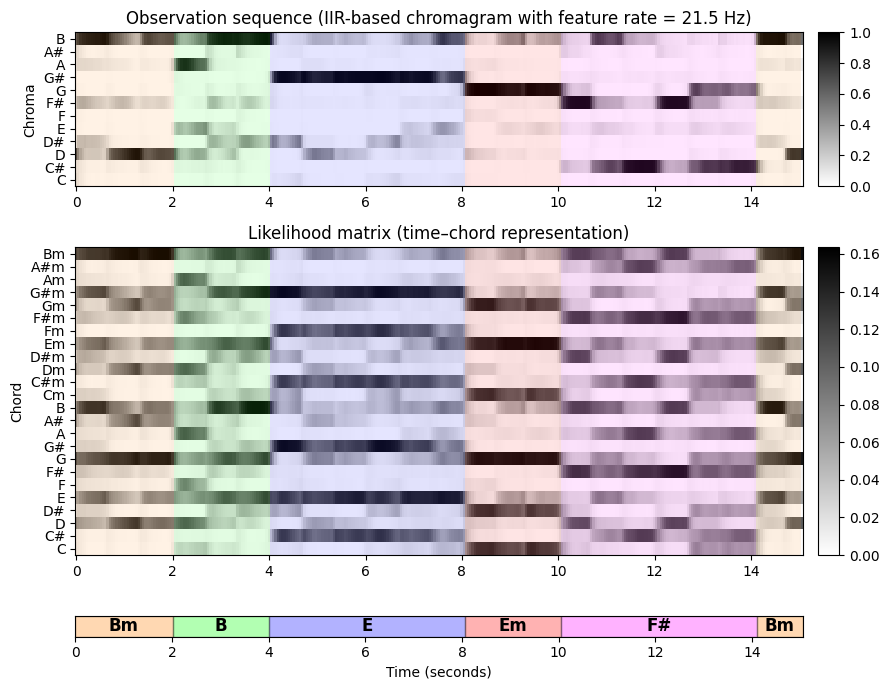

In [37]:
chord_labels = libfmp.c5.get_chord_labels(nonchord=False)
plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, chord_labels, version='IIR')

In [42]:
def plot_hmm_likelihood_matrix_alone(fn_wav, fn_ann, color_ann, version='STFT'):
    """
    Helper function to plot the observation sequence and the likelihood matrix of a given .wav file.
    
    Args:
        fn_wav (str): Filenname of WAV
        fn_ann (str): Filename of segment-based chord annotation
        chord_labels (list): List of chord labels
        color_ann: Color for annotations
        version (str): Technique used for front-end decomposition ('STFT', 'IIR', 'CQT') (Default value = 'STFT')
    """
    chord_labels = libfmp.c5.get_chord_labels(nonchord=False)
    N = 4096
    H = 1024
    X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=0.1, version=version)

    N_X = X.shape[1]

    # Chord recogntion
    chord_sim, chord_max = libfmp.c5.chord_recognition_template(X, norm_sim='1')

    # Annotations
    ann_matrix, ann_frame, ann_seg_frame, ann_seg_ind, ann_seg_sec = \
        libfmp.c5.convert_chord_ann_matrix(fn_ann, chord_labels, Fs=Fs_X, N=N_X, last=True)
    #P, R, F, TP, FP, FN = libfmp.c5.compute_eval_measures(ann_matrix, chord_max)

    cmap = libfmp.b.compressed_gray_cmap(alpha=1, reverse=False)
    fig, ax = plt.subplots(3, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                              'height_ratios': [1.5, 3, 0.2]}, figsize=(9, 7))

    libfmp.b.plot_chromagram(X, ax=[ax[0, 0], ax[0, 1]], Fs=Fs_X, clim=[0, 1], xlabel='',
                             title='Sequência de observações (%s com taxa rate = %0.1f Hz)' % (version, Fs_X), ylabel='Croma',)
    libfmp.b.plot_segments_overlay(ann_seg_sec, ax=ax[0, 0], time_max=x_dur,
                                   print_labels=False, colors=color_ann, alpha=0.1)

    libfmp.b.plot_matrix(chord_sim, ax=[ax[1, 0], ax[1, 1]], Fs=Fs_X, clim=[0, np.max(chord_sim)],
                         title='Matriz de Emissão (representação acorde-tempo)',
                         ylabel='Acorde', xlabel='')
    ax[1, 0].set_yticks(np.arange(len(chord_labels)))
    ax[1, 0].set_yticklabels(chord_labels)
    libfmp.b.plot_segments_overlay(ann_seg_sec, ax=ax[1, 0], time_max=x_dur,
                                   print_labels=False, colors=color_ann, alpha=0.1)

    libfmp.b.plot_segments(ann_seg_sec, ax=ax[2, 0], time_max=x_dur, time_label='Tempo (segundos)',
                           colors=color_ann,  alpha=0.3)
    ax[2,1].axis('off')
    plt.tight_layout()

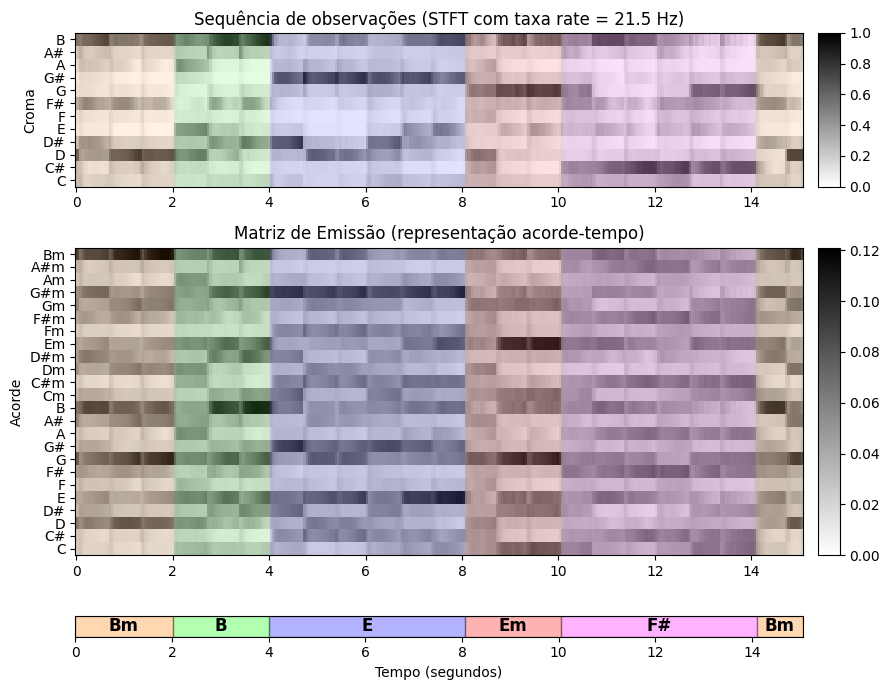

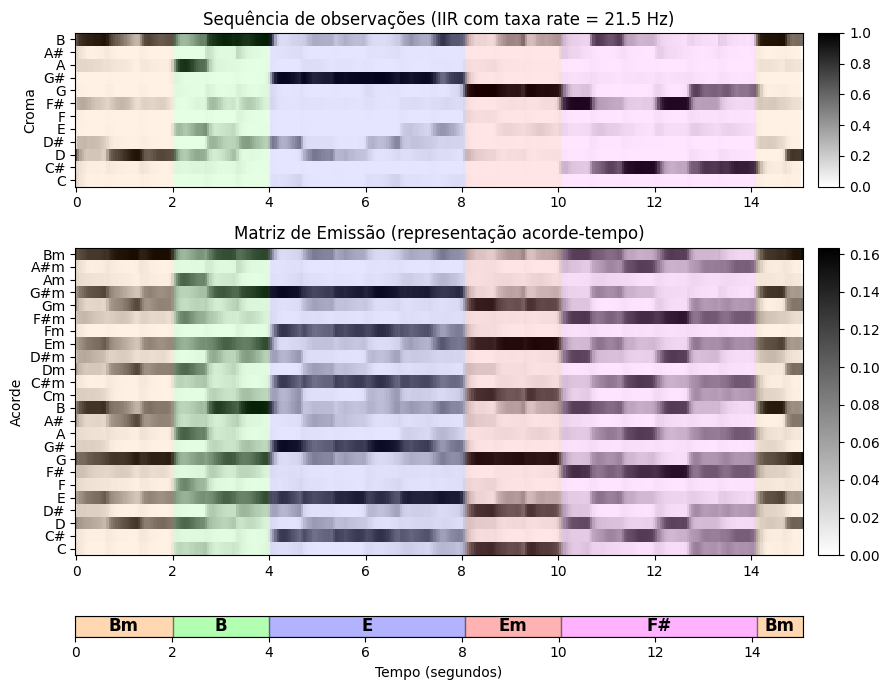

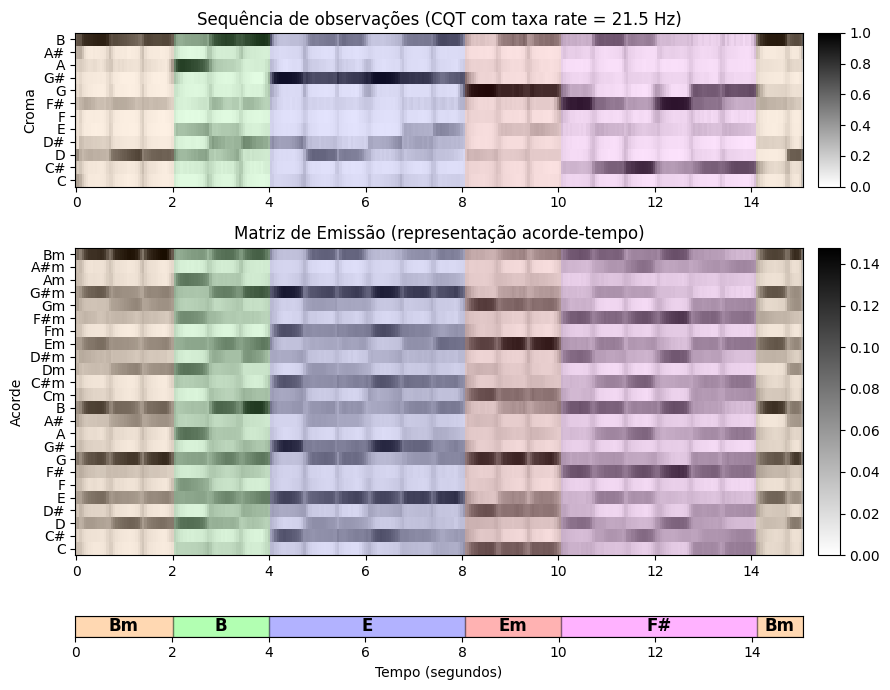

In [43]:
plot_hmm_likelihood_matrix_alone(fn_wav, fn_ann, color_ann, version='STFT')
plot_hmm_likelihood_matrix_alone(fn_wav, fn_ann, color_ann, version='IIR')
plot_hmm_likelihood_matrix_alone(fn_wav, fn_ann, color_ann, version='CQT')

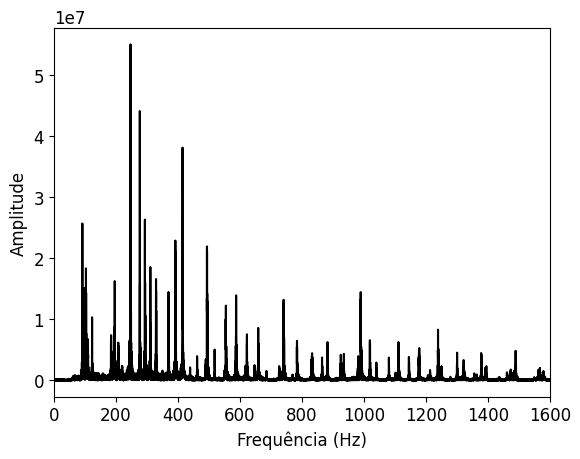

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Configurações globais para o tamanho da fonte
plt.rcParams.update({'font.size': 12})  # Altere 12 para o tamanho desejado

# Leitura do arquivo wav
rate, data = wavfile.read(fn_wav)

# Verifica se o arquivo é estéreo
if len(data.shape) == 2:
    data = data.mean(axis=1)  # Converte para mono pela média dos canais

# Aplica a Transformada de Fourier
fft_result = np.fft.fft(data)

# Obtém as frequências
frequencies = np.fft.fftfreq(len(fft_result), 1/rate)

# Plotando apenas a parte positiva do espectro de frequências
n = len(frequencies) // 2

# Prepara o plot com a linha em preto
plt.plot(frequencies[:n], np.abs(fft_result)[:n], color='black')

# Define os rótulos dos eixos
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')

# Limita o eixo x a 1600 Hz
plt.xlim(0, 1600)

# Configura o fundo para branco (escala de cinza invertida)
plt.gca().set_facecolor('white')

# Mostra o gráfico
plt.show()


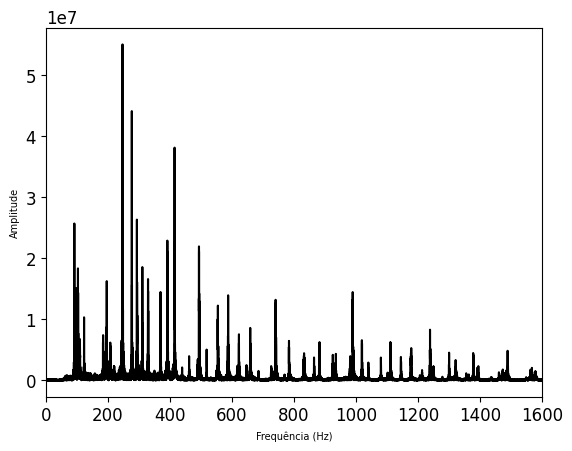

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Leitura do arquivo wav
rate, data = wavfile.read(fn_wav)

# Verifica se o arquivo é estéreo
if len(data.shape) == 2:
    data = data.mean(axis=1)  # Converte para mono pela média dos canais

# Aplica a Transformada de Fourier
fft_result = np.fft.fft(data)

# Obtém as frequências
frequencies = np.fft.fftfreq(len(fft_result), 1/rate)

# Plotando apenas a parte positiva do espectro de frequências
n = len(frequencies) // 2

# Prepara o plot com a linha em preto
plt.plot(frequencies[:n], np.abs(fft_result)[:n], color='black')

# Define os rótulos dos eixos com tamanho de fonte maior
plt.xlabel('Frequência (Hz)', fontsize=7)  # Altere 12 para o tamanho desejado
plt.ylabel('Amplitude', fontsize=7)

# Limita o eixo x a 1600 Hz
plt.xlim(0, 1600)

# Configura o fundo para branco (escala de cinza invertida)
plt.gca().set_facecolor('white')

# Mostra o gráfico
plt.show()


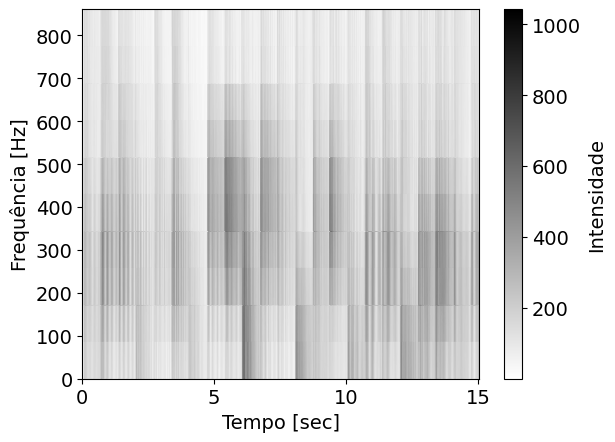

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

# Configurações globais para o tamanho da fonte
plt.rcParams.update({'font.size': 14})  # Altere 12 para o tamanho desejado

# Leitura do arquivo wav
rate, data = wavfile.read(fn_wav)

# Verifica se o arquivo é estéreo e converte para mono se necessário
if len(data.shape) == 2:
    data = data.mean(axis=1)

# Calcula a STFT
frequencies, times, Zxx = signal.stft(data, rate)

# Limitar as frequências a 1000 Hz
idx = np.where(frequencies <= 1000)[0]
frequencies = frequencies[idx]
Zxx = Zxx[idx, :]

# Plot o espectrograma em tons de cinza
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud', cmap='gray_r')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [sec]')
plt.colorbar(label='Intensidade')

plt.show()

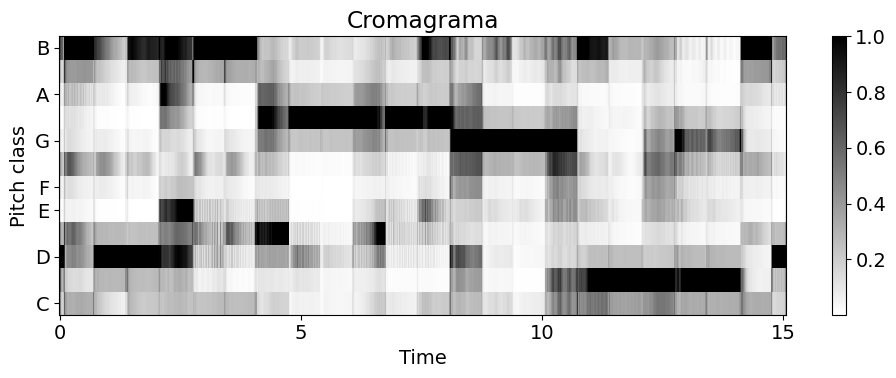

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Configurações globais para o tamanho da fonte
plt.rcParams.update({'font.size': 14})  # Altere 12 para o tamanho desejado

# Carregar o arquivo de áudio
file_path = fn_wav
y, sr = librosa.load(file_path)

# Calcula o cromagrama a partir da STFT
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Plotar o cromagrama
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', sr=sr, cmap='gray_r')
plt.colorbar()
plt.title('Cromagrama')
plt.tight_layout()
plt.show()

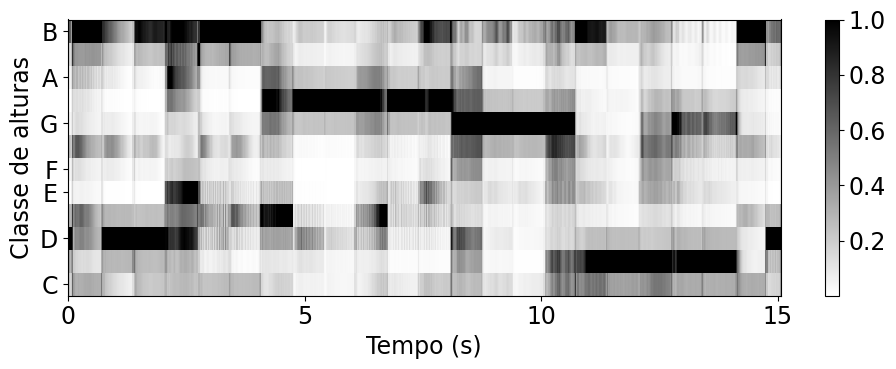

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Configurações globais para o tamanho da fonte
plt.rcParams.update({'font.size': 17})  # Altere 12 para o tamanho desejado

# Carregar o arquivo de áudio
file_path = fn_wav
y, sr = librosa.load(file_path)

# Calcula o cromagrama a partir da STFT
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Configura a figura
plt.figure(figsize=(10, 4))

# Cria um eixo
ax = plt.gca()

# Exibe o cromagrama
img = librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', sr=sr, cmap='gray_r', ax=ax)

# Adiciona a colorbar
plt.colorbar(img)

# Altera o título e os rótulos dos eixos
plt.xlabel('Tempo (s)')

# Altera a legenda do eixo y
ax.set_ylabel('Classe de alturas')

plt.tight_layout()
plt.show()

In [13]:
A = libfmp.c5.uniform_transition_matrix(p=0.15)
type(A)

numpy.ndarray

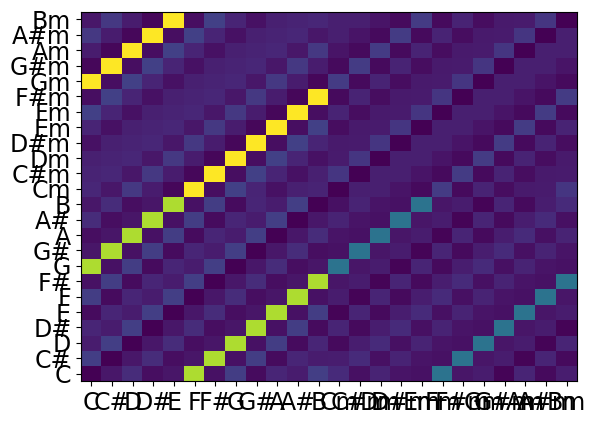

In [14]:
tr_matrix = '../Data/Matrices/matriz_de_transicao.csv'
df = pd.read_csv(tr_matrix, sep = ',', decimal = '.', header = 0, index_col = 0)
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

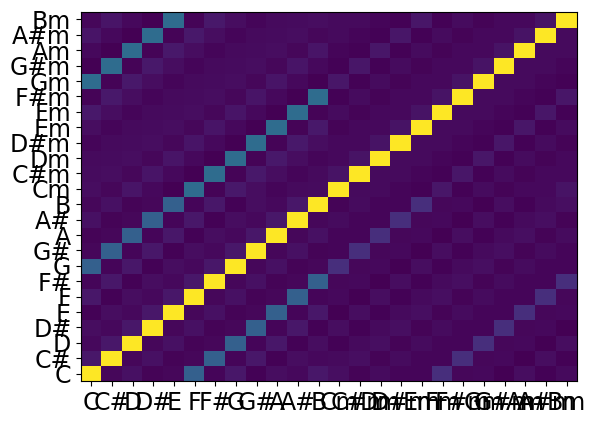

In [15]:
df_2 = edit_diagonal(df, 0.5)
plt.pcolor(df_2)
plt.yticks(np.arange(0.5, len(df_2.index), 1), df_2.index)
plt.xticks(np.arange(0.5, len(df_2.columns), 1), df_2.columns)
plt.show()

In [16]:
len(df_2)

24

In [17]:
df_2

,C,C#,D,D#,E,F,F#,G,G#,A,...,Dm,D#m,Em,Fm,F#m,Gm,G#m,Am,A#m,Bm
C,0.500000,0.010382,0.021424,0.006291,0.009986,0.153308,0.008094,0.031277,0.005191,0.017904,...,0.016585,0.009502,0.007918,0.067042,0.010030,0.013417,0.001936,0.017508,0.004223,0.014209
C#,0.031629,0.500000,0.010382,0.021424,0.006291,0.009986,0.153308,0.008094,0.031277,0.005191,...,0.007434,0.016585,0.009502,0.007918,0.067042,0.010030,0.013417,0.001936,0.017508,0.004223
D,0.013549,0.031629,0.500000,0.010382,0.021424,0.006291,0.009986,0.153308,0.008094,0.031277,...,0.021160,0.007434,0.016585,0.009502,0.007918,0.067042,0.010030,0.013417,0.001936,0.017508
D#,0.017904,0.013549,0.031629,0.500000,0.010382,0.021424,0.006291,0.009986,0.153308,0.008094,...,0.014209,0.021160,0.007434,0.016585,0.009502,0.007918,0.067042,0.010030,0.013417,0.001936
E,0.005191,0.017904,0.013549,0.031629,0.500000,0.010382,0.021424,0.006291,0.009986,0.153308,...,0.004223,0.014209,0.021160,0.007434,0.016585,0.009502,0.007918,0.067042,0.010030,0.013417
F,0.031277,0.005191,0.017904,0.013549,0.031629,0.500000,0.010382,0.021424,0.006291,0.009986,...,0.017508,0.004223,0.014209,0.021160,0.007434,0.016585,0.009502,0.007918,0.067042,0.010030
F#,0.008094,0.031277,0.005191,0.017904,0.013549,0.031629,0.500000,0.010382,0.021424,0.006291,...,0.001936,0.017508,0.004223,0.014209,0.021160,0.007434,0.016585,0.009502,0.007918,0.067042
G,0.153308,0.008094,0.031277,0.005191,0.017904,0.013549,0.031629,0.500000,0.010382,0.021424,...,0.013417,0.001936,0.017508,0.004223,0.014209,0.021160,0.007434,0.016585,0.009502,0.007918
G#,0.009986,0.153308,0.008094,0.031277,0.005191,0.017904,0.013549,0.031629,0.500000,0.010382,...,0.010030,0.013417,0.001936,0.017508,0.004223,0.014209,0.021160,0.007434,0.016585,0.009502
A,0.006291,0.009986,0.153308,0.008094,0.031277,0.005191,0.017904,0.013549,0.031629,0.500000,...,0.067042,0.010030,0.013417,0.001936,0.017508,0.004223,0.014209,0.021160,0.007434,0.016585


c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)


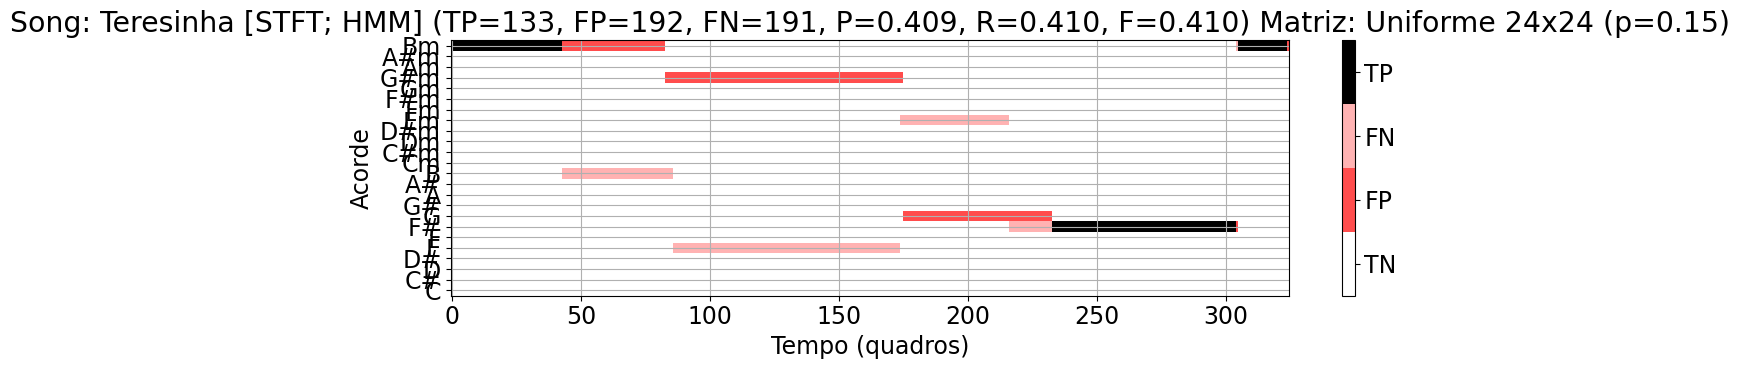

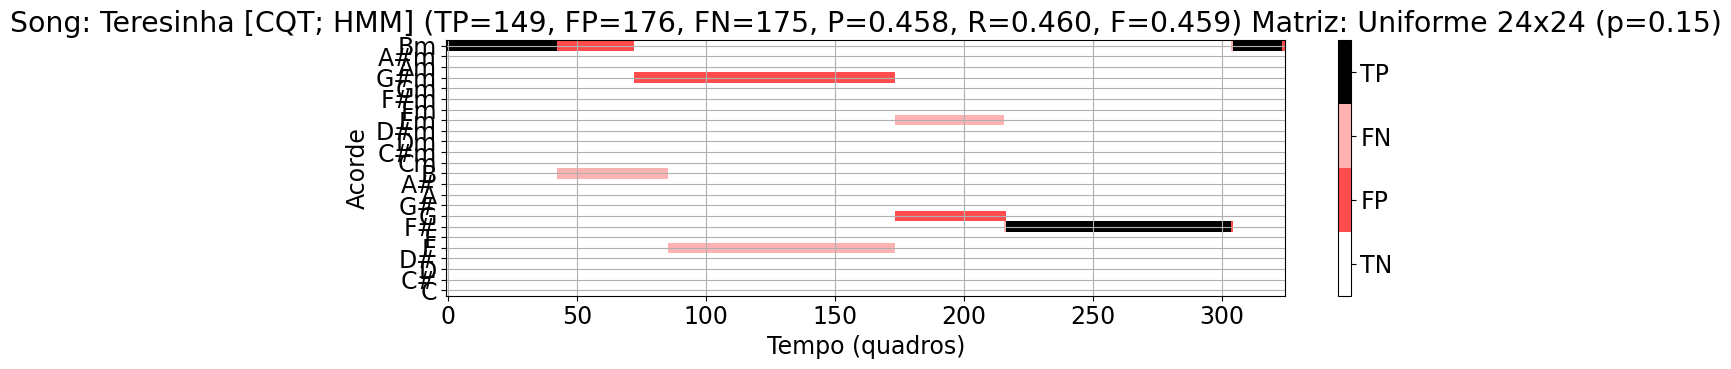

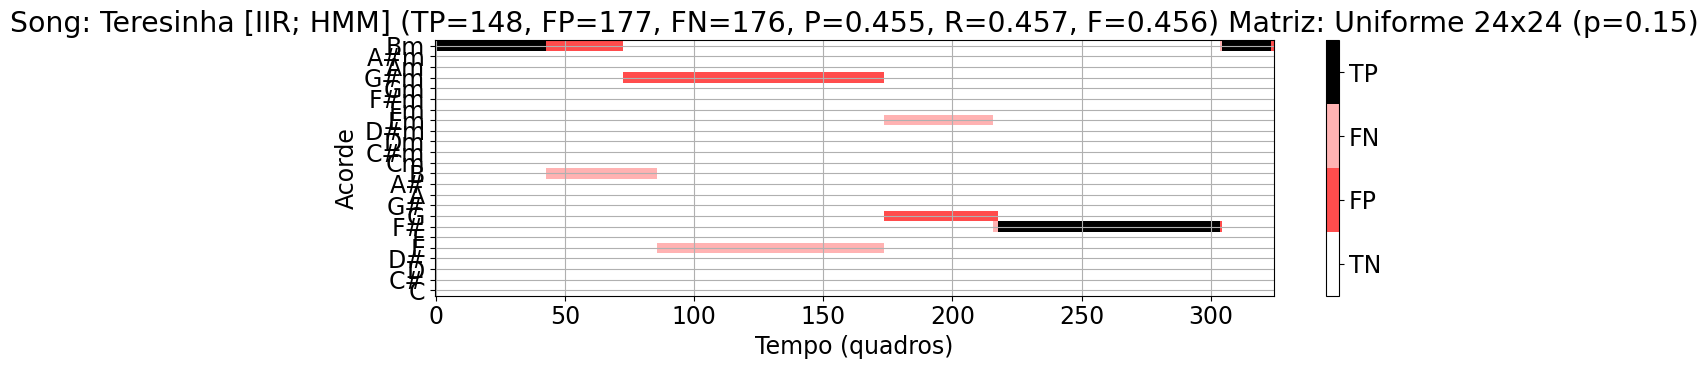

In [18]:
p = 0.9
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0], df, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], df, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0], df, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title)  

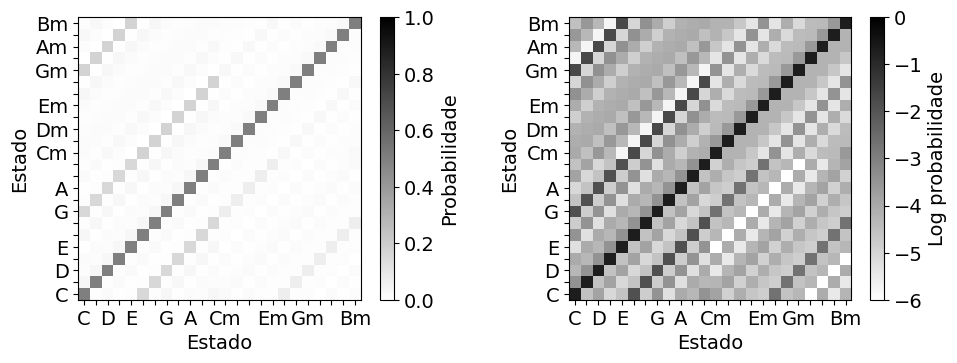

In [19]:
# Configurações globais para o tamanho da fonte
plt.rcParams.update({'font.size': 14})  # Altere 12 para o tamanho desejado
def plot_transition_matrix(A, log=True, ax=None, figsize=(6, 5), title='',
                           xlabel='Estado', ylabel='Estado',
                           cmap='gray_r', quadrant=False):
    """Plot a transition matrix for 24 chord models (12 major and 12 minor triads)

    Notebook: C5/C5S3_ChordRec_HMM.ipynb

    Args:
        A: Transition matrix
        log: Show log probabilities (Default value = True)
        ax: Axis (Default value = None)
        figsize: Width, height in inches (only used when ax=None) (Default value = (6, 5))
        title: Title for plot (Default value = '')
        xlabel: Label for x-axis (Default value = 'State (chord label)')
        ylabel: Label for y-axis (Default value = 'State (chord label)')
        cmap: Color map (Default value = 'gray_r')
        quadrant: Plots additional lines for C-major and C-minor quadrants (Default value = False)

    Returns:
        fig: The created matplotlib figure or None if ax was given.
        ax: The used axes.
        im: The image plot
    """
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax = [ax]

    if log is True:
        A_plot = np.log(A)
        cbar_label = 'Log probabilidade'
        clim = [-6, 0]
    else:
        A_plot = A
        cbar_label = 'Probabilidade'
        clim = [0, 1]
    im = ax[0].imshow(A_plot, origin='lower', aspect='equal', cmap=cmap, interpolation='nearest')
    im.set_clim(clim)
    plt.sca(ax[0])
    cbar = plt.colorbar(im)
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].set_title(title)
    cbar.ax.set_ylabel(cbar_label)

    chord_labels = get_chord_labels()
    chord_labels_squeezed_1 = chord_labels.copy()
    chord_labels_squeezed_2 = chord_labels.copy()
    for k in [1, 3, 5, 6, 8, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22]:
        chord_labels_squeezed_1[k] = ''
    for k in [1, 3, 5, 6, 8, 10, 11, 13, 15, 17, 18, 20, 22]:
        chord_labels_squeezed_2[k] = ''

    ax[0].set_xticks(np.arange(24))
    ax[0].set_yticks(np.arange(24))
    ax[0].set_xticklabels(chord_labels_squeezed_1)
    ax[0].set_yticklabels(chord_labels_squeezed_2)

    if quadrant is True:
        ax[0].axvline(x=11.5, ymin=0, ymax=24, linewidth=2, color='r')
        ax[0].axhline(y=11.5, xmin=0, xmax=24, linewidth=2, color='r')

    return fig, ax, im

# Load transition matrix estimated on the basis of the Beatles collection
tr_matrix = '../Data/Matrices/matriz_de_transicao.csv'
df = pd.read_csv(tr_matrix, sep = ',', decimal = '.', header = 0, index_col = 0)
A_est_df = edit_diagonal(df, 0.5)
A_est = A_est_df.to_numpy('float64')

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 
                                          'height_ratios': [1]}, 
                       figsize=(10, 3.8))

plot_transition_matrix(A_est, log=False, ax=[ax[0]])
plot_transition_matrix(A_est, ax=[ax[1]])
plt.tight_layout()

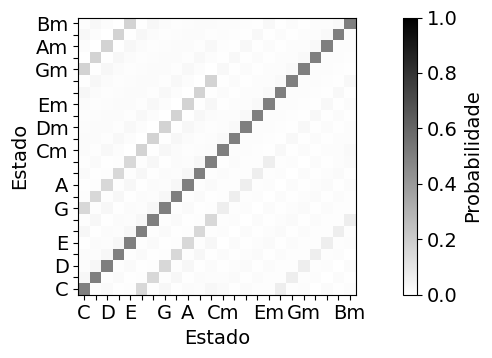

In [20]:
fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, 
                       figsize=(10, 3.8))

plot_transition_matrix(A_est, log=False, ax=[ax])
plt.tight_layout()

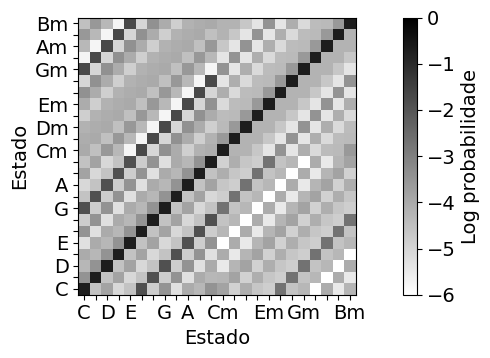

In [21]:
fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, 
                       figsize=(10, 3.8))
plot_transition_matrix(A_est, ax=[ax])
plt.tight_layout()

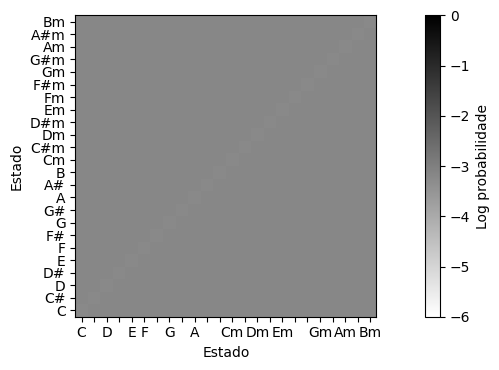

In [11]:
def uniform_transition_matrix(p=0.01, N=24):
    """Computes uniform transition matrix

    Notebook: C5/C5S3_ChordRec_HMM.ipynb

    Args:
        p (float): Self transition probability (Default value = 0.01)
        N (int): Column and row dimension (Default value = 24)

    Returns:
        A (np.ndarray): Output transition matrix
    """
    off_diag_entries = (1-p) / (N-1)     # rows should sum up to 1
    A = off_diag_entries * np.ones([N, N])
    np.fill_diagonal(A, p)
    return A

fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, 
                       figsize=(10, 3.8))

p = 0.04
A_uni = uniform_transition_matrix(p)
plot_transition_matrix(A_uni, ax=[ax])
plt.tight_layout()

c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)


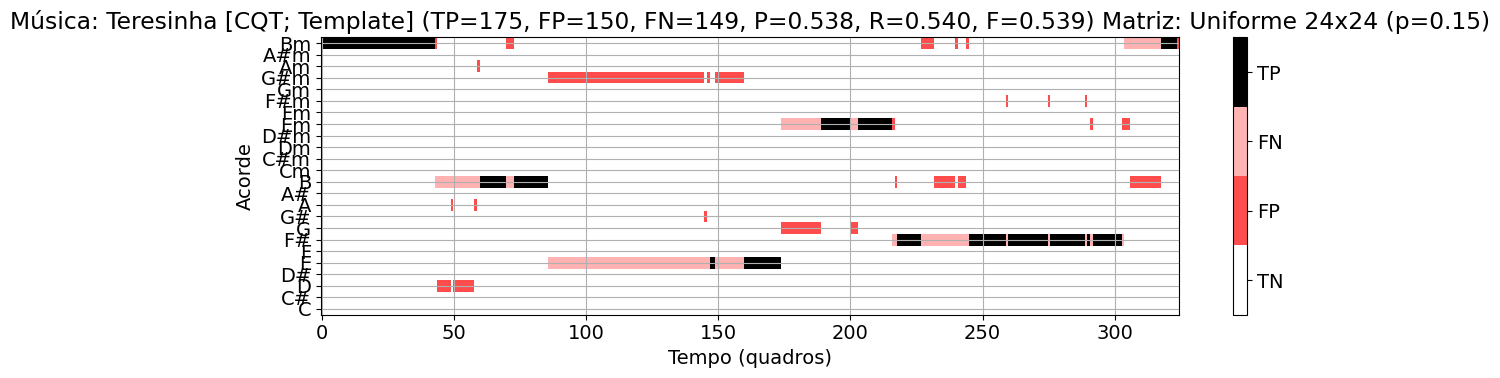

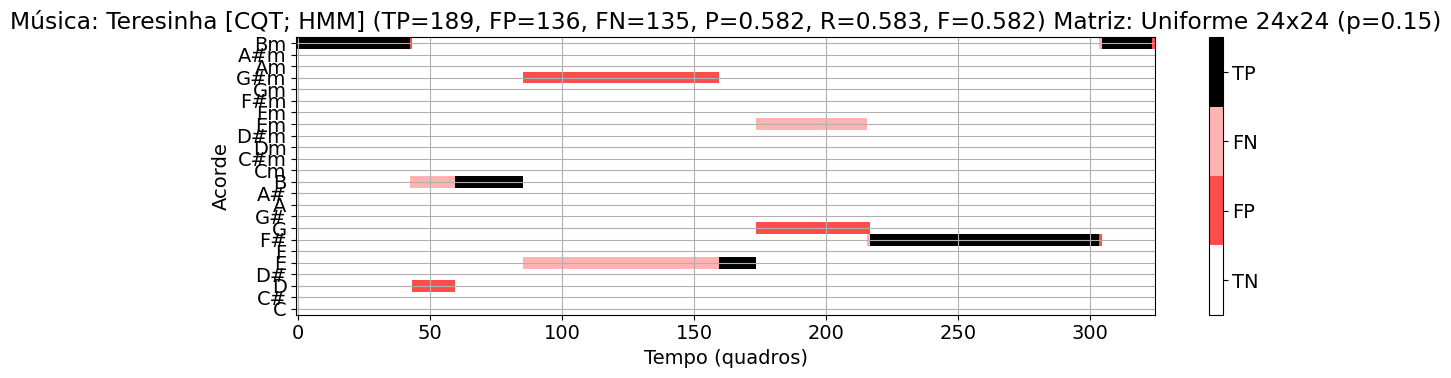

In [23]:
for s in song_selected:
    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Música: %s [CQT; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Música: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)


C:\Users\rodri\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


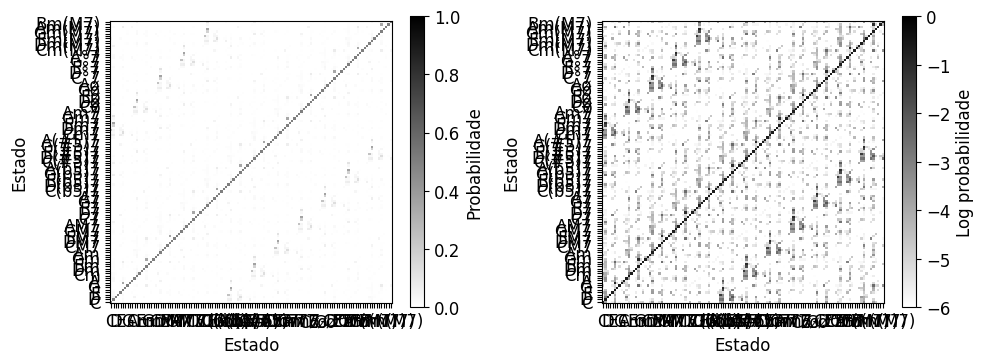

In [60]:
# Configurações globais para o tamanho da fonte
plt.rcParams.update({'font.size': 12})  # Altere 12 para o tamanho desejado
def plot_transition_matrix(A, log=True, ax=None, figsize=(6, 5), title='',
                           xlabel='Estado', ylabel='Estado',
                           cmap='gray_r', quadrant=False):
    """Plot a transition matrix for 24 chord models (12 major and 12 minor triads)

    Notebook: C5/C5S3_ChordRec_HMM.ipynb

    Args:
        A: Transition matrix
        log: Show log probabilities (Default value = True)
        ax: Axis (Default value = None)
        figsize: Width, height in inches (only used when ax=None) (Default value = (6, 5))
        title: Title for plot (Default value = '')
        xlabel: Label for x-axis (Default value = 'State (chord label)')
        ylabel: Label for y-axis (Default value = 'State (chord label)')
        cmap: Color map (Default value = 'gray_r')
        quadrant: Plots additional lines for C-major and C-minor quadrants (Default value = False)

    Returns:
        fig: The created matplotlib figure or None if ax was given.
        ax: The used axes.
        im: The image plot
    """
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax = [ax]

    if log is True:
        A_plot = np.log(A)
        cbar_label = 'Log probabilidade'
        clim = [-6, 0]
    else:
        A_plot = A
        cbar_label = 'Probabilidade'
        clim = [0, 1]
    im = ax[0].imshow(A_plot, origin='lower', aspect='equal', cmap=cmap, interpolation='nearest')
    im.set_clim(clim)
    plt.sca(ax[0])
    cbar = plt.colorbar(im)
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].set_title(title)
    cbar.ax.set_ylabel(cbar_label)

    size_A = len(A)

    chord_labels = get_chord_labels(m_type=1)
    chord_labels_squeezed_1 = chord_labels.copy()
    chord_labels_squeezed_2 = chord_labels.copy()
    for k in [1, 3, 5, 6, 8, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22,
            23, 25, 27, 29, 30, 32, 34, 35, 37, 38, 39, 41, 42, 44, 45, 46,
            47, 49, 51, 53, 54, 56, 58, 59, 61, 62, 63, 65, 66, 68, 69, 70,
            71, 73, 75, 77, 78, 80, 82, 83, 85, 86, 87, 89, 90, 92, 93, 94,
            95, 97, 99, 101, 102, 104, 106, 107, 109, 110, 111, 113, 114, 116, 117, 118]:
        chord_labels_squeezed_1[k] = ''
    for k in [1, 3, 5, 6, 8, 10, 11, 13, 15, 17, 18, 20, 22,
            23, 25, 27, 29, 30, 32, 34, 35, 37, 39, 41, 42, 44, 46,
            47, 49, 51, 53, 54, 56, 58, 59, 61, 63, 65, 66, 68, 70,
            71, 73, 75, 77, 78, 80, 82, 83, 85, 87, 89, 90, 92, 94,
            95, 97, 99, 101, 102, 104, 106, 107, 109, 111, 113, 114, 116, 118]:
        chord_labels_squeezed_2[k] = ''

    ax[0].set_xticks(np.arange(size_A))
    ax[0].set_yticks(np.arange(size_A))
    ax[0].set_xticklabels(chord_labels_squeezed_1)
    ax[0].set_yticklabels(chord_labels_squeezed_2)

    if quadrant is True:
        ax[0].axvline(x=11.5, ymin=0, ymax=24, linewidth=2, color='r')
        ax[0].axhline(y=11.5, xmin=0, xmax=24, linewidth=2, color='r')

    return fig, ax, im

# Load transition matrix estimated on the basis of the Beatles collection
tr_matrix = '../Data/Matrices/matriz_de_transicao_2.csv'
df = pd.read_csv(tr_matrix, sep = ',', decimal = '.', header = 0, index_col = 0)
A_est_df = edit_diagonal(df, 0.5)
A_est = A_est_df.to_numpy('float64')

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 
                                          'height_ratios': [1]}, 
                       figsize=(10, 3.8))

plot_transition_matrix(A_est, log=False, ax=[ax[0]])
plot_transition_matrix(A_est, ax=[ax[1]])
plt.tight_layout()

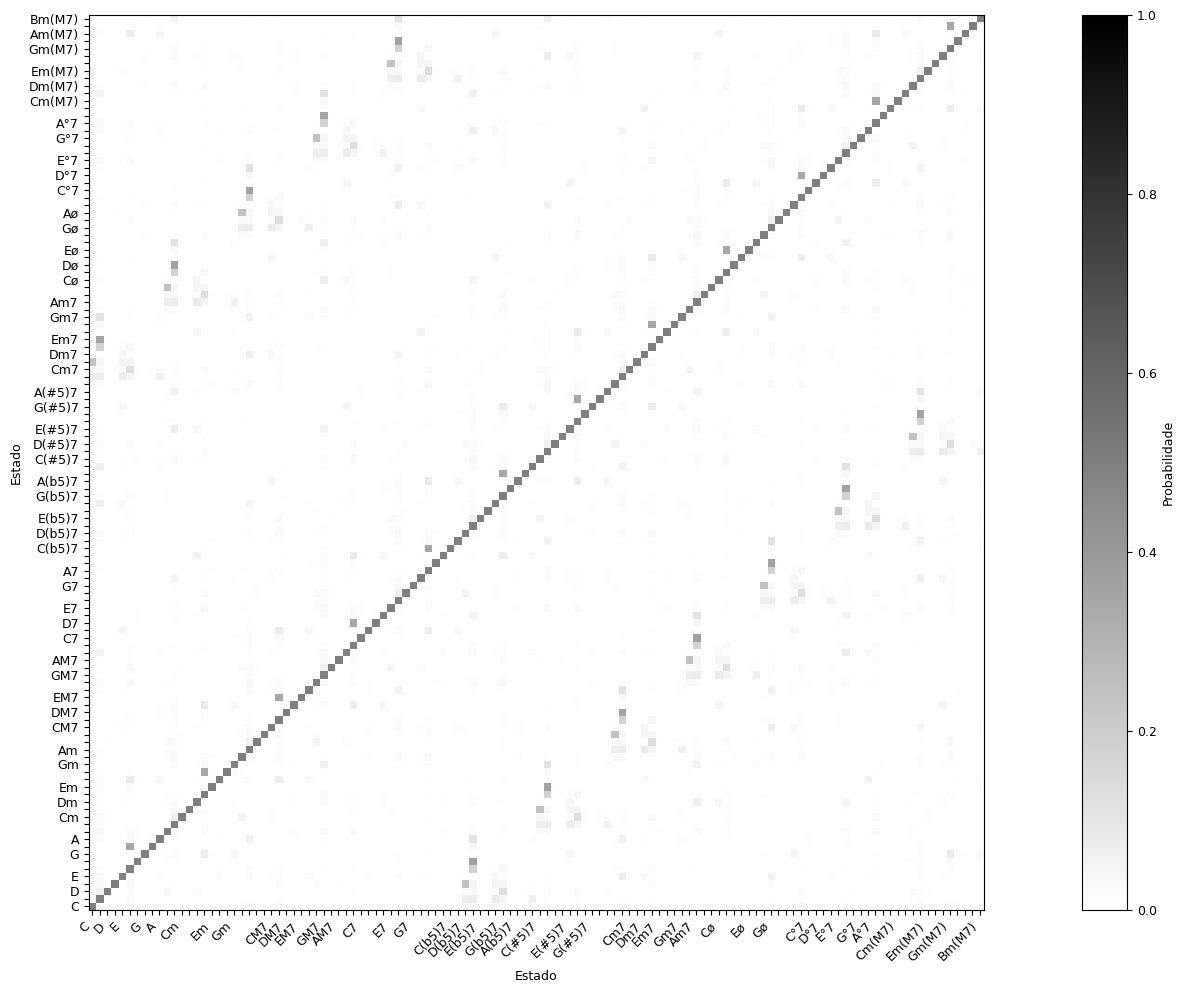

In [61]:
plt.rcParams.update({'font.size': 9})
fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, 
                       figsize=(20, 10))
plt.xticks(rotation=45, ha="right")
plot_transition_matrix(A_est, log=False, ax=[ax])
plt.tight_layout()

C:\Users\rodri\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


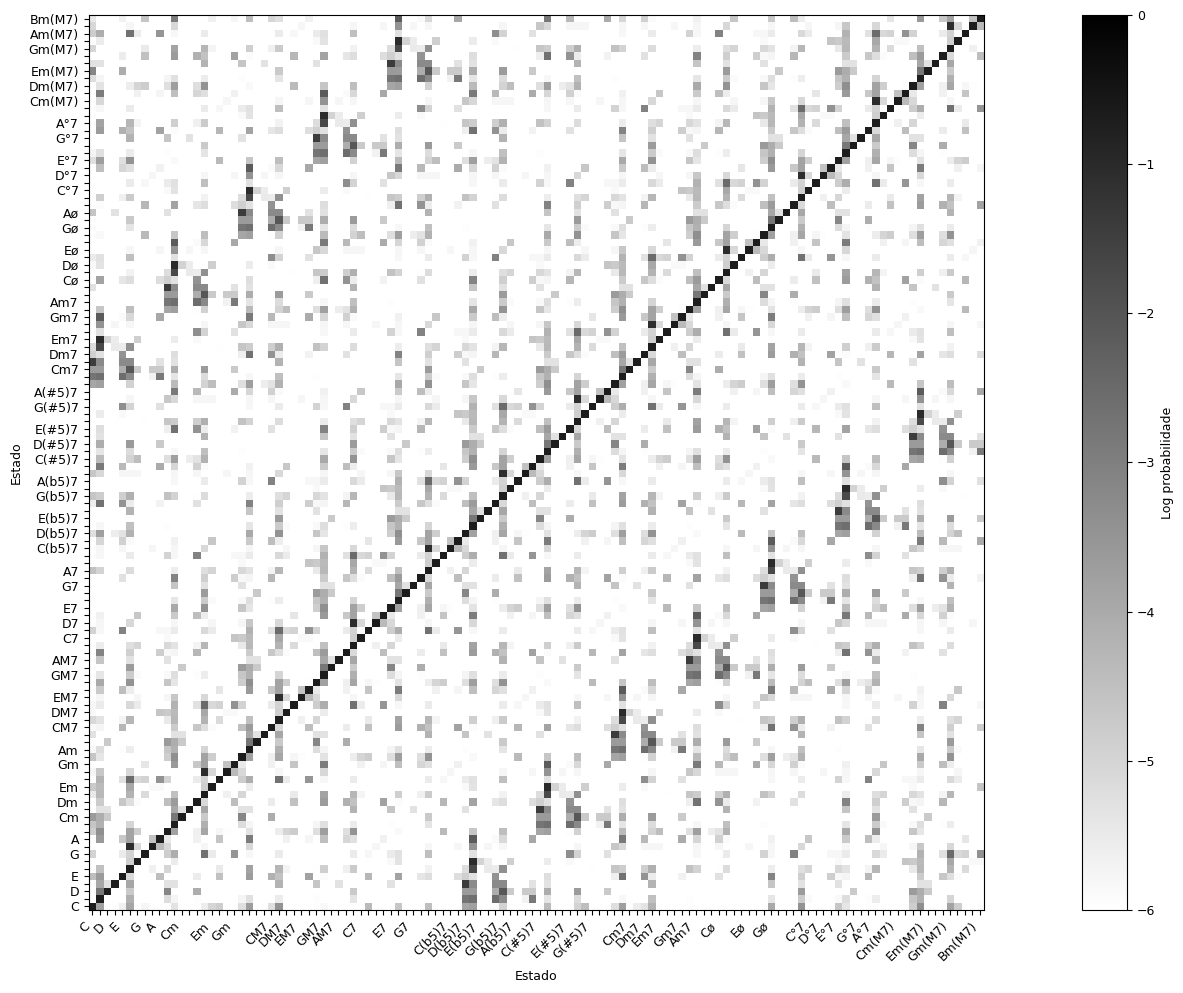

In [55]:
plt.rcParams.update({'font.size': 9})
fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, 
                       figsize=(20, 10))
plt.xticks(rotation=45, ha="right")
plot_transition_matrix(A_est, ax=[ax])
plt.tight_layout()

In [27]:
len(get_chord_labels(m_type=1))

120